<a href="https://colab.research.google.com/github/axonImpulses/plant_genome_associations/blob/master/norman_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from google.colab import drive
drive.mount('/content/drive/')

filename = '/content/drive/My Drive/Colab Notebooks/cogs.txt'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
import umap
reducer = umap.UMAP()

In [0]:
gene_index = 4
genome_index = 1
cogfile = '/content/drive/My Drive/Colab Notebooks/cogs.txt'

def genomes_genes(file, genome_index, gene_index):
  unique_genomes = []
  unique_genes = []
  with open(file, 'r+') as fh:
    for line in fh.readlines()[1:]:
      if line.split()[genome_index] not in unique_genomes:
        unique_genomes.append(line.split()[genome_index])
      if line.split()[gene_index] not in unique_genes:
        unique_genes.append(line.split()[gene_index])
  return [unique_genomes, unique_genes]


def matrix(file, genes, genomes, gene_col, genome_col):
  gcols = pd.Index(genes, name = "genes")
  grows = pd.Index(genomes, name = "genomes")
  df = pd.DataFrame(data = np.zeros(shape = (len(genomes), len(genes))), index = grows, columns = gcols)
  fh = open(file, 'r+')
  for line in fh.readlines()[1:]:
    genome = line.split()[genome_index]
    gene = line.split()[gene_index]
    df.at[genome, gene] = 1
  fh.close()
  return df

gng = genomes_genes(cogfile, genome_index, gene_index)
allgenomes = gng[0]
allgenes = gng[1]
feature_matrix = matrix(cogfile, allgenes, allgenomes, gene_index, genome_index)
feature_matrix['Y'] = [0] * len(feature_matrix)
print(feature_matrix.head(10))
print(len(feature_matrix))

genes       COG1522  COG0859  COG0483  COG1066  ...  COG2214  COG5256  COG3388  Y
genomes                                         ...                              
2505679030      1.0      1.0      1.0      1.0  ...      0.0      0.0      0.0  0
651053067       1.0      0.0      1.0      1.0  ...      0.0      0.0      0.0  0
637000240       1.0      1.0      1.0      1.0  ...      0.0      0.0      0.0  0
637000208       1.0      1.0      1.0      1.0  ...      0.0      0.0      0.0  0
650716076       1.0      1.0      1.0      1.0  ...      0.0      0.0      0.0  0
637000053       1.0      1.0      1.0      1.0  ...      0.0      0.0      0.0  0
637000192       1.0      1.0      1.0      1.0  ...      0.0      0.0      0.0  0
651324080       1.0      0.0      1.0      1.0  ...      0.0      0.0      0.0  0
2571042743      1.0      0.0      1.0      1.0  ...      0.0      0.0      0.0  0
2574180005      1.0      0.0      1.0      1.0  ...      0.0      0.0      0.0  0

[10 rows x 4212

In [0]:
fh = open('/content/drive/My Drive/Colab Notebooks/cogs.txt', 'r+')
for i in fh.readlines()[:10]:
  print(i, end = '')

taxid	label	geneoid	cog	catgetory
Bacteroidetes	2505679030	NPA	2505794583	COG1522	K
Bacteroidetes	2505679030	NPA	2505794589	COG0859	M
Bacteroidetes	2505679030	NPA	2505794821	COG0483	G
Alphaproteobacteria	651053067	PA	651092731	COG1066	O
Alphaproteobacteria	651053067	PA	651092733	COG0034	F
Bacteroidetes	2505679030	NPA	2505789388	COG2217	P
Alphaproteobacteria	637000240	NPA	637882566	COG0101	J
Alphaproteobacteria	637000240	NPA	637882571	COG0548	E
Alphaproteobacteria	637000240	NPA	637882577	COG0642	T


In [0]:
# Read the metadata to obtain the ground truth
import csv


   

In [0]:
with open("/content/drive/My Drive/Colab Notebooks/metadata_3837_img.tsv") as tsvfile:
    reader = csv.DictReader(tsvfile, dialect = 'excel-tab')
    for ind, row in enumerate(reader):
        #if ind > 20: 
        #    break
        genome_id = row['taxon_oid']
        if genome_id in feature_matrix.index:
            # convert the OD to a taxon
            taxon = list(row.values())[4:-1]
            feature_matrix['Y'] = feature_matrix['Y'].astype(object)
            feature_matrix.at[genome_id, 'Y'] = taxon
print(feature_matrix.head(10))
     

genes       COG1522  ...                                                  Y
genomes              ...                                                   
2505679030      1.0  ...  [Bacteroidetes, Bacteroidetes, Cytophagia, Cyt...
651053067       1.0  ...  [Alphaproteobacteria, Proteobacteria, Alphapro...
637000240       1.0  ...  [Alphaproteobacteria, Proteobacteria, Alphapro...
637000208       1.0  ...  [Burkholderiales, Proteobacteria, Betaproteoba...
650716076       1.0  ...  [Pseudomonas, Proteobacteria, Gammaproteobacte...
637000053       1.0  ...  [Burkholderiales, Proteobacteria, Betaproteoba...
637000192       1.0  ...  [Alphaproteobacteria, Proteobacteria, Alphapro...
651324080       1.0  ...  [Bacillales, Firmicutes, Bacilli, Bacillales, ...
2571042743      1.0  ...  [Actinobacteria_two, Actinobacteria, Actinobac...
2574180005      1.0  ...  [Actinobacteria_two, Actinobacteria, Actinobac...

[10 rows x 4212 columns]


In [0]:
def genomicdistance(genome_id, reference_id):
# Recursive algorithm which checks for similarity
  def matching(taxon_1, taxon_2):
    
    if len(taxon_1) < 1 or len(taxon_2) < 1:
        return 0
    if taxon_1[0] == taxon_2[0]:
      return 1 + matching(taxon_1[1:], taxon_2[1:])
    else: 
      return 0
  #print(reference_id in feature_matrix.index)
  taxon_1 = feature_matrix.at[reference_id,'Y']
  taxon_2 = feature_matrix.at[genome_id, 'Y']
  
  if len(taxon_1) > len(taxon_2):
      return matching(taxon_1, taxon_2) / len(taxon_1)
  else:
      return matching(taxon_1, taxon_2) / len(taxon_2)


In [0]:

for genome, row in feature_matrix.iterrows():
    #print(type(genome))
    #print(genome)
    distance = genomicdistance(genome, '2505679030')
    feature_matrix.at[genome, 'Y2'] = distance
    #print(distance)
print(feature_matrix.iloc[450:500,-1])

genomes
2576861342    0.000000
2576861384    0.000000
2576861345    0.000000
2576861346    0.000000
2576861348    0.000000
2576861349    0.000000
2576861368    0.000000
2576861352    0.000000
2576861377    0.000000
2576861424    0.000000
2576861435    0.000000
2576861471    0.000000
2576861456    0.833333
2576861478    0.000000
2576861425    0.000000
2576861498    0.333333
2576861499    0.333333
2576861554    0.333333
640427122     0.000000
2576861487    0.000000
2576861488    0.000000
2576861656    0.000000
2576861677    0.000000
2576861679    0.000000
2576861765    0.000000
2576861768    0.000000
2576861772    0.000000
2576861745    0.000000
2576861748    0.000000
2576861752    0.000000
2576861754    0.000000
2576861755    0.000000
2576861758    0.000000
2576861779    0.000000
2576861725    0.000000
2576861726    0.000000
2576861707    0.000000
2576861731    0.000000
2576861732    0.000000
2576861737    0.000000
2576861669    0.000000
2576861740    0.000000
2571042112    0.000000
257

In [0]:
# 2nd implementation of genomic distance using the Bray-Curtis metric
def bcdistance(gene_ref, gene_2check):
  pass
  # build ete tree TODO: read ete doc
  # scrape terms/taxons for both genes TODO: find out how to get ncbi id from img id
  # 1 or 0 for if they are equal, make sure they are the same length
  # return scipy bc distance (see scipy.pdist)
  # beneficial because its more normalized? and more accepted metric lolz



In [0]:
'''###Questions for Keshav
Why Bray-Curtis distance? 
I kind of have an idea and ik its like more normalized (ik we 
 normalize features, but does normalizing matter in terms of your ground truth)
Does Bray-Curtis distance penalize in any direction of closeness (like for example
 having same kingdom but nothing else vs being similar down to the genus)
^ related to above, recommended weights for each taxon?

If you wanna do mathusan's method, just increment and then divide by max number of terms

Also why Bray-Curtis over dashing?


'''

In [0]:
'''Currently, pure genomic distances (from dashing) will occasionally group
 together taxonomically diverse microbes. We are making the assumption, this 
 is because the genomic algorithm is picking up similarities which are 
 uncharacteristic of the bug.'''
 '''Means that dashing will group together microbes that are taxonomically
 diverse, we assume this is because it is identifying commonalities between them
 that are not representative of taxonomic similarity...

 ^

 ^How is dashing doing this? How are we avoiding this?
 ^finding number of genome bit/mnucleotide similarities and not really functional/gene similarity

 """Feature selection to deduce these taxonomically characteristic gene sets will 
allow us to lower gene space when looking for isolation site specific genes.""""

(this means that we eliminate all genes that do not affect, say, taxonomic
 distance which in turn won't affect isolation site, to my understanding?)

i.e. if all genomes express a metabolic enzyme then its safe to say that 
metabolic enzyme isnt too useful/ unique to that bacteria, 
but if its only present in 1 or 2 bacteria then it might be significant to 
where that bacteria is isolated or the function of that bacteria 
(is there enough data tho? yes right?)
Keshav: "Lol really depends we ideally want a huge tight cluster that has microbes from diff isolation sites"
>If this doesnt work out just use dasher distances and do plant analysis off that


Aside: cool potential to discover gene function and stuff and unknown stuff
Also im making the assumption: feature selection isnt good enough to reduce to
only 2 features? since our data is so large


TIME FOR SOME UMAP *BABYYYY* oh wait feature selection.

In [0]:
print(feature_matrix.head())

genes       COG1522  ...   Y2
genomes              ...     
2505679030      1.0  ...  1.0
651053067       1.0  ...  0.0
637000240       1.0  ...  0.0
637000208       1.0  ...  0.0
650716076       1.0  ...  0.0

[5 rows x 4213 columns]


In [0]:
'''
what exactly would the dimensions of the returned result from umap really mean 
I read thru pca and i understand you're like reducing down n dimensions to the 
principle components, but how can you interpret the data and cluster it properly relative to the ground truth
when you only have the information from 2 or so dimensions, (no axis to tell gtruth on)

UMAP: uniform manifold approximation-spatial coords within this abstract space (2D, or 10D is ok) is equivalent to original dimensionality

Keshav: tSNE is shit, so is PCA

Or is the whole point that you can cluster this and then check the ground truth manually using the labels and a plot

SyntaxError: ignored

In [0]:
Y = pd.DataFrame(data = feature_matrix.iloc[:, -1], index = feature_matrix.index)
feature_matrix.drop(columns = ['Y', 'Y2'])
print(feature_matrix)

#print(Y)
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#X, y = load_iris(return_X_y=True)


genes       COG1522  ...   Y2
genomes              ...     
2505679030      1.0  ...  1.0
651053067       1.0  ...  0.0
637000240       1.0  ...  0.0
637000208       1.0  ...  0.0
650716076       1.0  ...  0.0
...             ...  ...  ...
2643221931      1.0  ...  0.0
2643221933      1.0  ...  0.0
2643221934      1.0  ...  0.0
2643221904      1.0  ...  0.0
2643221912      1.0  ...  0.0

[3837 rows x 4213 columns]


In [0]:
from sklearn.feature_selection import VarianceThreshold
# split feature matrix into features and target
X = feature_matrix.iloc[:, 0:-2]

print('Original Features :',  X, ' with ',  len(X.columns) , ' features ')
Y = feature_matrix.iloc[:, -1]
print('Original Targets :', Y)

# remove features with low variance, aka features with low correlation to a microbe's function/taxonomy
selector = VarianceThreshold(threshold=(.05)).fit(X,Y)

# selecting only most salient features,alternatively could use df.drop()
vdf = feature_matrix[feature_matrix.columns[selector.get_support(indices=True)]]


X = vdf
print('V-based reduced feature matrix with ', str(len(X.columns)), 'features: \n', X)
print('\n from ', str(len(X)), ' genomes')
# update the target
Y = feature_matrix.loc[list(vdf.index), 'Y2']
#print('Y)
#print(X)


Original Features : genes       COG1522  COG0859  COG0483  ...  COG2214  COG5256  COG3388
genomes                                ...                           
2505679030      1.0      1.0      1.0  ...      0.0      0.0      0.0
651053067       1.0      0.0      1.0  ...      0.0      0.0      0.0
637000240       1.0      1.0      1.0  ...      0.0      0.0      0.0
637000208       1.0      1.0      1.0  ...      0.0      0.0      0.0
650716076       1.0      1.0      1.0  ...      0.0      0.0      0.0
...             ...      ...      ...  ...      ...      ...      ...
2643221931      1.0      0.0      1.0  ...      0.0      0.0      0.0
2643221933      1.0      0.0      1.0  ...      0.0      1.0      0.0
2643221934      1.0      0.0      1.0  ...      0.0      0.0      0.0
2643221904      1.0      1.0      1.0  ...      0.0      0.0      0.0
2643221912      1.0      1.0      1.0  ...      0.0      0.0      0.0

[3837 rows x 4211 columns]  with  4211  features 
Original Targets : 

In [0]:
'''
HDBScan is a clustering algorithm right

And it will only work well on 2d data, which hopefully umap should give us

Because the original features are lost in a sense does that mean that at a large scale there isnt a way to see

In [0]:
''' How do you actually tune hyperparameters for HDBScan iteratively and using your taxonomic distance as a loss function
Per cluster, taxonomic similarity score, optimize via modelselection gridsearch algorithm or do it manually

(avg taxonomic distance divided by loss)
lol or do u do it manually

In [0]:
# Numerically encode species level, and on clustering side you have 1234 (species level)


In [0]:
import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
embedding.shape
print(embedding)

[[ 7.16827     1.9446443 ]
 [-7.962232    2.6540387 ]
 [-8.670106    4.814838  ]
 ...
 [-6.2995725   3.7145793 ]
 [ 5.3293166  -0.84797424]
 [ 5.38489    -0.8994349 ]]


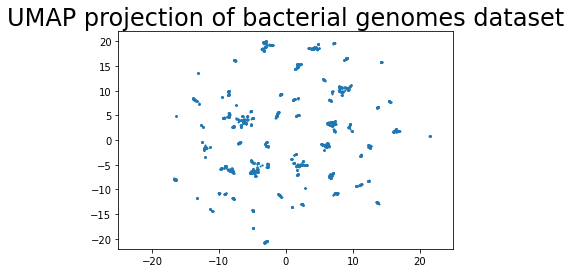

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.scatter(*embedding.T, s = 1)
plt.scatter(embedding[:, 0], embedding[:, 1],  s = 1) #c=[sns.color_palette()[x] for x in Y])]
#plt.gca().set_aspect('equal', 'datalim')
axes = plt.gca()
axes.set_xlim([-25,25])
axes.set_ylim([-22,22])
plt.title('UMAP projection of bacterial genomes dataset', fontsize=24);

In [0]:
!pip install umap-learn[plot]


In [0]:
!pip install umap-learn.plot
import umap
import numpy
import umap.plot

mapper = umap.UMAP().fit(X)
umap.plot.points(mapper)

ERROR: Could not find a version that satisfies the requirement umap-learn.plot (from versions: none)
ERROR: No matching distribution found for umap-learn.plot


/usr/local/lib/python3.6/dist-packages/umap/plot.py:29: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

    conda install datashader bokeh holoviews colorcet
    
  """


ImportError: ignored

In [0]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 2.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2361272 sha256=4e69d35742748f6a66dd1b0d1fdec7cece18233ae2f94bf5ed80129bf2490e8a
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


207


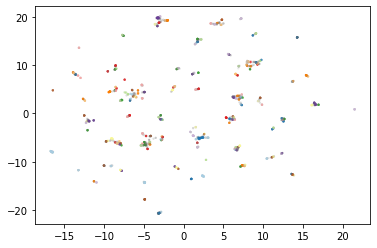

In [0]:
import hdbscan
from sklearn.datasets import make_blobs
a = embedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples = 5).fit(embedding)
print(clusterer.labels_.max())

color_palette = sns.color_palette('Paired', clusterer.labels_.max() + 1)
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*embedding.T, s=5, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [0]:
print(embedding)

[[ 7.16827     1.9446443 ]
 [-7.962232    2.6540387 ]
 [-8.670106    4.814838  ]
 ...
 [-6.2995725   3.7145793 ]
 [ 5.3293166  -0.84797424]
 [ 5.38489    -0.8994349 ]]


In [0]:
print(embedding.shape)

(3837, 2)
